In [417]:
import pandas as pd
import numpy as np

In [418]:
team_abbrev = {
'LOS': 'LAD',
'TAM': 'TBR',    
'MIL': 'MIL',
'SEA': 'SEA',
'TOR': 'TOR',
'LAA': 'LAA',
'OAK': 'OAK',
'HOU': 'HOU',
'KAN': 'KCR',
'BOS': 'BOS',
'PHI': 'PHI',
'ARI': 'ARI',
'CUB': 'CHC',
'ATL': 'ATL',
'SFO': 'SFG',
'COL': 'COL',
'NYM': 'NYM',
'SDG': 'SDP',
'TEX': 'TEX',
'MIN': 'MIN',
'NYY': 'NYY',
'WAS': 'WSN',
'STL': 'STL',
'BAL': 'BAL',
'PIT': 'PIT',
'CIN': 'CIN',
'CLE': 'CLE',
'CWS': 'CHW',
'MIA': 'MIA',
'DET': 'DET',
'LAD': 'LAD'
}


In [419]:
team_codes = {
'LAD': '01',
'TBR': '02',    
'MIL': '03',
'SEA': '04',
'TOR': '05',
'LAA': '06',
'OAK': '07',
'HOU': '08',
'KCR': '09',
'BOS': '10',
'PHI': '11',
'ARI': '12',
'CHC': '13',
'ATL': '14',
'SFG': '15',
'COL': '16',
'NYM': '17',
'SDP': '18',
'TEX': '19',
'MIN': '20',
'NYY': '21',
'WSN': '22',
'STL': '23',
'BAL': '24',
'PIT': '25',
'CIN': '26',
'CLE': '27',
'CHW': '28',
'MIA': '29',
'DET': '30'
}


In [420]:
def clean_18():
    df_18 = pd.read_excel('../data/mlb odds 2018.xlsx')
    df_18['Run Line'] = df_18['Run Line'].astype('str')
    df_18['Unnamed: 18'] = df_18['Unnamed: 18'].astype('str')
    df_18['RL'] = df_18['Run Line'] + '(' + df_18['Unnamed: 18'] + ')'
    df_18.drop(columns=['Run Line', 'Unnamed: 18'], inplace=True)
    cols = ['Date', 'Rot', 'VH', 'Team', 'Pitcher', '1st', '2nd', '3rd', '4th',
       '5th', '6th', '7th', '8th', '9th', 'Final', 'Open', 'Close', 'RL',
       'Open OU', 'Unnamed: 20', 'Close OU', 'Unnamed: 22']
    df_18 = df_18[cols]
    df_18.columns= ['Date', 'Rot', 'VH', 'Team', 'Pitcher', '1st', '2nd', '3rd', '4th',
       '5th', '6th', '7th', '8th', '9th', 'Final', 'Open', 'Close', 'RL',
       'Open OU', 'Unnamed: 19', 'Close OU', 'Unnamed: 21']
    return df_18

In [458]:
def clean_19():
    df_19 = pd.read_excel('../data/mlb odds 2019 (2).xlsx')
    df_19['Run Line'] = df_19['Run Line'].astype('str')
    df_19['Unnamed: 18'] = df_19['Unnamed: 18'].astype('str')
    df_19['RL'] = df_19['Run Line'] + '(' + df_19['Unnamed: 18'] + ')'
    df_19.drop(columns=['Run Line', 'Unnamed: 18'], inplace=True)
    cols = ['Date', 'Rot', 'VH', 'Team', 'Pitcher', '1st', '2nd', '3rd', '4th',
       '5th', '6th', '7th', '8th', '9th', 'Final', 'Open', 'Close', 'RL',
       'Open OU', 'Unnamed: 20', 'Close OU', 'Unnamed: 22']
    df_19 = df_19[cols]
    df_19.columns= ['Date', 'Rot', 'VH', 'Team', 'Pitcher', '1st', '2nd', '3rd', '4th',
       '5th', '6th', '7th', '8th', '9th', 'Final', 'Open', 'Close', 'RL',
       'Open OU', 'Unnamed: 19', 'Close OU', 'Unnamed: 21']
    return df_19

In [421]:
df_18 = clean_18()

In [459]:
df_19 = clean_19()

In [597]:
def odds_preprocessing(df_18, df_19):
    # df =pd.read_csv('home_fav.csv')
    df_14 = pd.read_excel('../data/mlb_odds_2014.xlsx')
    df_15 = pd.read_excel('../data/mlb odds 2015.xlsx')
    df_16 = pd.read_excel('../data/mlb odds 2016.xlsx')
    df_17 = pd.read_excel('../data/mlb odds 2017.xlsx')
#     df_19 = pd.read_excel('../data/mlb odds 2019.xlsx')
    df_14['Year'] = 2014
    df_15['Year'] = 2015
    df_16['Year'] = 2016
    df_17['Year'] = 2017
    df_18['Year'] = 2018
    df_19['Year'] = 2019
    df_total = pd.concat([df_14, df_15, df_16, df_17, df_18, df_19], ignore_index=True)
    vis = df_total.iloc[::2].copy()
    home = df_total.iloc[1::2].copy()
    vis.columns = ['Date', 'Rot', 'VH', 'Visitor Team', 'Visitor Pitcher', '1st', '2nd', '3rd', '4th',
       '5th', '6th', '7th', '8th', '9th', 'Final', 'Open Visitor ML', 'Close Visitor ML', 'Visitor RL',
       'Open OU', 'Open OU Price', 'Close OU', 'Close OU Price', 'Year']
    home.columns = ['Date', 'Rot', 'VH', 'Home Team', 'Home Pitcher', '1st', '2nd', '3rd', '4th',
       '5th', '6th', '7th', '8th', '9th', 'Final', 'Home Open ML', 'Home Close ML', 'Home RL',
       'Open OU', 'Open OU Price', 'Close OU', 'Close OU Price', 'Year']
    game_count = [i for i in range(1,vis.shape[0] + 1)]
    vis['game_id'] = game_count
    home['game_id'] = game_count
    combined = pd.merge(vis, home, on='game_id')
    combined[['Visitor RL','Visitor RL Price']] = combined['Visitor RL'].str.split('\(|\)', expand=True).iloc[:,[0,1]]
    combined[['Home RL','Home RL Price']] = combined['Home RL'].str.split('\(|\)', expand=True).iloc[:,[0,1]]
    combined['Date_x'] = combined['Date_x'].astype('str')
    combined['Date_x'] = combined['Date_x'].str.zfill(4)
    combined['Year_x'] = combined['Year_x'].astype('str')
    combined['date'] = combined['Year_x'] + combined['Date_x']
    combined['date'] = pd.to_datetime(combined['date'])
    rl = combined.copy()
    rl.drop([5777], inplace=True)
    rl['Visitor RL'] = rl['Visitor RL'].str.strip('+')
    rl['Home RL'] = rl['Home RL'].str.strip('+')
    rl['Visitor RL Price'] = rl['Visitor RL Price'].str.strip('+')
    rl['Home RL Price'] = rl['Home RL Price'].str.strip('+')
    home_rl = rl['Home RL']
    rl['Home RL'] = pd.to_numeric(home_rl)
    rl['Home RL Price'] = pd.to_numeric(rl['Home RL Price'])
    rl['Visitor RL'] = pd.to_numeric(rl['Visitor RL'])
    rl['Visitor RL Price'] = pd.to_numeric(rl['Visitor RL Price'])
    rl['Final_x'] = pd.to_numeric(rl['Final_x'])
    rl['Final_y'] = pd.to_numeric(rl['Final_y'])
    rl['Home Pitch Hand'] = rl['Home Pitcher'].str.split('-', expand=True)[1]
    rl['Visitor Pitch Hand'] = rl['Visitor Pitcher'].str.split('-', expand=True)[1]
    rl['Home Pitcher'] = rl['Home Pitcher'].str[:-2]
    rl['Visitor Pitcher'] = rl['Visitor Pitcher'].str[:-2]
    ###change team codes
    rl['Visitor Team'] = rl['Visitor Team'].map(team_abbrev)
    rl['Home Team'] = rl['Home Team'].map(team_abbrev)
    rl['Home Code'] = rl['Home Team'].map(team_codes)
    rl['Vis Code'] = rl['Visitor Team'].map(team_codes)
    rl['date'] = pd.to_datetime(rl['date'])
    rl['stats_join'] = rl['date'].apply(lambda x: x.strftime('%Y%m%d')) + rl['Home Code'].astype(str) + rl['Vis Code'].astype(str)
    rl = rl[['game_id', 'date', 'Visitor Team',
       'Visitor Pitcher', 'Home Team', 'Home Pitcher', 'Open Visitor ML',
       'Close Visitor ML', 'Home Open ML', 'Home Close ML', 'Final_x',
       'Final_y', 'Visitor RL', 'Visitor RL Price', 'Home RL',
       'Home RL Price', 'Home Code', 'Vis Code', 'stats_join']]
    return rl

In [598]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [599]:
combined_14_19 = odds_preprocessing(df_18, df_19)

In [601]:
# combined_14_19.to_csv('../data/odds_cleaned2019.csv')

In [602]:
def get_data():
    df = pd.read_csv('../data/team_batting/allbatting.csv')
    df1 = pd.read_csv('../data/team_pitching/allpitching.csv')

    merged_rows = df.merge(df1, how="inner", left_index=True, right_index=True)
    return merged_rows




In [603]:
def last_three(df, col_list):
    last_3 = lambda x: x.rolling(6).mean().shift(1)
    df[col_list] = df[col_list].apply(last_3)
    return df


col_list = ['PA', 'AB_x', 'R_x', 'H_x', '2B_x', '3B_x', 'HR_x', 'RBI', 'BB_x', 'IBB_x',
       'SO_x', 'HBP_x', 'SH_x', 'SF_x', 'ROE_x', 'GDP_x', 'SB_x', 'CS_x',
       'BA', 'OBP', 'SLG', 'OPS', 'LOB', '#_x', 'IP', 'H_y', 'R_y', 'ER', 'UER',
       'BB_y', 'SO_y', 'HR_y', 'HBP_y', 'ERA', 'BF', 'Pit', 'Str', 'IR',
       'IS', 'SB_y', 'CS_y', 'AB_y', '2B_y', '3B_y', 'IBB_y', 'SH_y',
       'SF_y', 'ROE_y', 'GDP_y', '#_y']


def compress_rows(df):
    df['date_month'] = df['Date_x'].str.split(' ', expand=True)[0]
    df['date_day'] = df['Date_x'].str.split(' ', expand=True)[1]
    months = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
    df['date_month'] = df['date_month'].map(months)
    df['date_month'] = df['date_month'].astype(str)
    df['date_month'] = df['date_month'].str.zfill(2)
    df['date_day'] = df['date_day'].str.zfill(2)
    df[' Year_x'] = df[' Year_x'].astype(float)
    df[' Year_x'] = df[' Year_x'].astype(int)
    df[' Year_x'] = df[' Year_x'].astype(str)
    df['full_date'] = df[' Year_x'] + '-'+ df['date_month'] + '-' + df['date_day']
    df['full_date'] = df['full_date'].str.rstrip('susp')
    df['full_date'] = pd.to_datetime(df['full_date'])
    df.sort_values(by=['full_date', 'Umpire'], inplace=True)
    return df

In [629]:
def combine_rows(df3):
    team1 = df3.iloc[::2].copy()
    team2 = df3.iloc[1::2].copy()
    game_count = [i for i in range(1,int(df3.shape[0] / 2) + 1)]
    team1['game_id'] = game_count
    team2['game_id'] = game_count
    full_combined = pd.merge(team1, team2, on='game_id')
    return full_combined


# full_combined = combine_rows(merged_rows)

def final_combine(full_combined):
    full_combined['team_1'] = full_combined['Opp_x_x'].map(team_codes)
    full_combined['team_2'] = full_combined['Opp_x_y'].map(team_codes)
    full_combined['Unnamed: 2_x_y'] = full_combined['Unnamed: 2_x_y'].fillna(1)
    full_combined['Unnamed: 2_x_y'] = full_combined['Unnamed: 2_x_y'].map({'@': 0, 1: 1})
    df4 = pd.read_csv('../data/odds_cleaned2019.csv')
    df4['stats_join'] = df4['stats_join'].astype('str')
    full_combined['full_date_y'] = pd.to_datetime(full_combined['full_date_y'])
    full_combined['stats_join'] = full_combined['full_date_y'].apply(lambda x: x.strftime('%Y%m%d')) + full_combined['team_1'].astype(str) + full_combined['team_2'].astype(str)
    full_combined['Home Team'] = np.where(full_combined['Unnamed: 2_x_y'] == 0, full_combined['Opp_x_y'], full_combined['Opp_x_x'])
    full_combined['Away Team'] = np.where(full_combined['Unnamed: 2_x_y'] == 1, full_combined['Opp_x_y'], full_combined['Opp_x_x'])
    full_combined['Home Code'] = full_combined['Home Team'].map(team_codes)
    full_combined['Away Code'] = full_combined['Away Team'].map(team_codes)
    full_combined['stats_join'] = full_combined['full_date_y'].apply(lambda x: x.strftime('%Y%m%d')) + full_combined['Home Code'].astype(str) + full_combined['Away Code'].astype(str)
    stats_odds = pd.merge(full_combined, df4, on='stats_join')
    stats_odds['result'] = np.where(stats_odds['Final_x'] - stats_odds['Final_y'] > 0, 0, 1)
    stats_odds1 = stats_odds.copy()
    return stats_odds1

In [642]:

def main(clf, stats_odds1):
    stats_odds1.drop(columns=['Thr_x',
       'Opp. Starter (GmeSc)_x', ' Year_x_x', 'Gtm_y_x', 'Date_y_x',
       'Unnamed: 2_y_x', 'Opp_y_x', 'Rslt_y_x', 'IP_x', 'H_y_x', 'R_y_x',
       'ER_x', 'UER_x', 'BB_y_x', 'SO_y_x', 'HR_y_x', 'HBP_y_x', 'ERA_x',
       'BF_x', 'Pit_x', 'Str_x', 'IR_x', 'IS_x', 'SB_y_x', 'CS_y_x',
       'AB_y_x', '2B_y_x', '3B_y_x', 'IBB_y_x', 'SH_y_x', 'SF_y_x',
       'ROE_y_x', 'GDP_y_x', '#_y_x', 'Umpire_x',
       'Pitchers Used (Rest-GameScore-Dec)_x', ' Year_y_x',
       'date_month_x', 'date_day_x', 'full_date_x', 'game_id_x',
       'Gtm_x_y', 'Date_x_y', 'Unnamed: 2_x_y', 'Opp_x_y', 'Rslt_x_y', 'Thr_y',
       'Opp. Starter (GmeSc)_y', ' Year_x_y', 'Gtm_y_y', 'Date_y_y',
       'Unnamed: 2_y_y', 'Opp_y_y', 'Rslt_y_y', 'IP_y', 'H_y_y', 'R_y_y',
       'ER_y', 'UER_y', 'BB_y_y', 'SO_y_y', 'HR_y_y', 'HBP_y_y', 'ERA_y',
       'BF_y', 'Pit_y', 'Str_y', 'IR_y', 'IS_y', 'SB_y_y', 'CS_y_y',
       'AB_y_y', '2B_y_y', '3B_y_y', 'IBB_y_y', 'SH_y_y', 'SF_y_y',
       'ROE_y_y', 'GDP_y_y', '#_y_y', 'Umpire_y',
       'Pitchers Used (Rest-GameScore-Dec)_y', ' Year_y_y',
       'date_month_y', 'date_day_y', 'full_date_y', 'team_1', 'team_2',
       'stats_join', 'Home Team_x', 'Away Team', 'Home Code_x',
       'Away Code', 'Unnamed: 0', 'game_id_y', 'date',
       'Visitor Team', 'Visitor Pitcher', 'Home Team_y', 'Home Pitcher', 'Home Code_y', 'Vis Code', 'Final_x', 'Final_y', 'Gtm_x_x', 'Date_x_x', 'Unnamed: 2_x_x', 'Opp_x_x', 'Rslt_x_x'], inplace=True)

    stats_odds1_16 = stats_odds1.iloc[:9898]

    stats_odds1_17 = stats_odds1.iloc[9898:]

    stats_odds1_16 = stats_odds1_16.dropna()

    stats_odds1_17 = stats_odds1_17.dropna()
    # return stats_odds1_16, stats_odds1_17

### keep or pop opening moneylines
    hopen_ml_16 = stats_odds1_16.pop('Home Open ML') 
    vopen_ml_16 = stats_odds1_16.pop('Open Visitor ML')
#     hopen_ml_16 = stats_odds1_16['Home Open ML'] 
#     vopen_ml_16 = stats_odds1_16['Open Visitor ML']
    stats_odds1_16.drop(columns=['Close Visitor ML', 'Home Close ML'], inplace=True)

    hopen_ml_17 = stats_odds1_17.pop('Home Open ML') 
    vopen_ml_17 = stats_odds1_17.pop('Open Visitor ML')
#     hopen_ml_17 = stats_odds1_17['Home Open ML'] 
#     vopen_ml_17 = stats_odds1_17['Open Visitor ML']
    stats_odds1_17.drop(columns=['Close Visitor ML', 'Home Close ML'], inplace=True)
    
###drop Visitor's and Home RL Price
#     stats_odds1_16.drop(columns=['Visitor RL Price', 'Home RL Price'], inplace=True)
#     stats_odds1_17.drop(columns=['Visitor RL Price', 'Home RL Price'], inplace=True)


    y = stats_odds1_16.pop('result')

    X = stats_odds1_16

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

    # clf = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=10, n_jobs=-2)

#     clf.fit(X_train, y_train)

    y_preds = clf.predict(X_test)

    clf.predict_proba(X_test)

    train_accuracy = np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy'))
    recall = np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='recall'))
    precision = np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='precision'))
#     print('Random Forest Train: ')
#     print('Train Accuracy: ', train_accuracy)
#     print('Recall: ', recall)
#     print('Precision: ', precision)

    list(zip(X, clf.feature_importances_))

    feature_import = list(zip(X, clf.feature_importances_))
    feature_import.sort(key=lambda x: x[1], reverse=True)
    feature_import = feature_import[:10]
    plt.bar(*zip(*feature_import))
    plt.xticks(rotation='vertical')

    ####Logistic Regression

    clf1 = LogisticRegression(solver='lbfgs', max_iter=2000)
    clf1.fit(X_train, y_train)
    y_preds1 = clf1.predict(X_test)
    train_accuracy1 = np.mean(cross_val_score(clf1, X_train, y_train, cv=5, scoring='accuracy'))
    recall1 = np.mean(cross_val_score(clf1, X_train, y_train, cv=5, scoring='recall'))
    precision1 = np.mean(cross_val_score(clf1, X_train, y_train, cv=5, scoring='precision'))
#     print("Logistic Regression Train:")
#     print("Train Accuracy: ", train_accuracy1)
#     print("Recall: ", recall1)
#     print("Precision: ", precision1)

    #### test results on holdout
    y = stats_odds1_17.pop('result')

    X = stats_odds1_17

    y_preds = clf.predict(X)
    probs = clf.predict_proba(X)
    y_pred1 = clf1.predict(X)

#     print("Random Forest Holdout:")
#     print("Holdout Accuracy:",metrics.accuracy_score(y, y_preds))
#     print("Holdout Recall:", metrics.recall_score(y, y_preds))
#     print("Holdout Precision:", metrics.precision_score(y, y_preds))

#     print("Logistic Regression Holdout:")
#     print("Train Accuracy: ",metrics.accuracy_score(y, y_pred1))
#     print("Recall: ", metrics.recall_score(y, y_pred1))
#     print("Precision: ", metrics.precision_score(y, y_pred1))


    X['prob_0'] = probs[:,0] 
    X['prob_1'] = probs[:,1]

    X['y_preds'] = y_preds

    X['result'] = y

    X['Open Visitor ML'] = vopen_ml_17 

    X['Home Open ML'] = hopen_ml_17

    X['Visitors Odds Prob'] = X['Open Visitor ML'].apply(lambda x: abs(int(x))/(abs(int(x)) + 100) if int(x) < 100 else 100/(int(x)+100))
    X['Home Odds Prob'] = X['Home Open ML'].apply(lambda x: abs(int(x))/(abs(int(x)) + 100) if int(x) < 100 else 100/(int(x)+100))

#     X['max_model_prob'] = X[["prob_0", "prob_1"]].max(axis=1) * 100
#     X['min_model_prob'] = X[["prob_0", "prob_1"]].min(axis=1) * 100

#     X['max_odds_prob'] = X[['Visitors Odds Prob', 'Home Odds Prob']].max(axis=1) * 100
#     X['min_odds_prob'] = X[['Visitors Odds Prob', 'Home Odds Prob']].min(axis=1) * 100
    X['v_edge'] = X['prob_0'] - X['Visitors Odds Prob']
    X['h_edge'] = X['prob_1'] - X['Home Odds Prob']
    
    conditions = [
        (X['v_edge'] > X['h_edge']) & (X['v_edge'] > 0),
        (X['v_edge'] <= X['h_edge']) & (X['h_edge'] > 0),
        (X['v_edge'] > X['h_edge']) & (X['v_edge'] < 0),
        (X['v_edge'] <= X['h_edge']) & (X['h_edge'] < 0),
    ]
    choices = [0, 1, 2, 2]
    X['pick'] = np.select(conditions, choices)
    
    X['incorrect'] = np.where(X['result'] == X['pick'], 0, 1)
    
    conditions2 = [
        (X['v_edge'] > X['h_edge']) & (X['v_edge'] > 0.0225), #& (X['v_edge'] < 0.02),
        (X['v_edge'] <= X['h_edge']) & (X['h_edge'] > 0.0225), #& (X['h_edge'] < 0.02),
#         (X['v_edge'] > X['h_edge']) & (X['v_edge'] >= 0.03),
#         (X['v_edge'] <= X['h_edge']) & (X['h_edge'] >= 0.03),
        (X['v_edge'] > X['h_edge']) & (X['v_edge'] <= 0.0225),
        (X['v_edge'] <= X['h_edge']) & (X['h_edge'] <= 0.0225),
    ]
    choices2 = [10, 10, 0, 0]
    X['wager'] = np.select(conditions2, choices2)
    
    X['Home Payout'] = X['Home Open ML'].apply(lambda x: (100/abs(int(x)) + 1)*10 if int(x) < 100 else (int(x)/100 + 1)*10)                               
    X['Visitor Payout'] = X['Open Visitor ML'].apply(lambda x: (100/abs(int(x)) + 1)*10 if int(x) < 100 else (int(x)/100 + 1)*10)

    conditions1 = [
        (X['incorrect'] == 0) & (X['pick'] == 0) & (X['wager'] == 10),
        (X['incorrect'] == 0) & (X['pick'] == 1) & (X['wager'] == 10),
#         (X['incorrect'] == 0) & (X['pick'] == 0) & (X['wager'] == 20),
#         (X['incorrect'] == 0) & (X['pick'] == 1) & (X['wager'] == 20),
        (X['incorrect'] == 1) & (X['wager'] == 10),
        (X['incorrect'] == 1) & (X['wager'] == 0)]
    choices1 = [X['Visitor Payout'], X['Home Payout'], 0, 0] #X['Visitor Payout']*2, X['Home Payout']*2, 0, 0]
    X['payout'] = np.select(conditions1, choices1)

#     X['potential edge fav'] = X['max_model_prob'] - X['max_odds_prob']
#     X['potential edge dog'] = X['min_model_prob'] - X['min_odds_prob']
#     X['potential edge'] = X[['potential edge fav', 'potential edge dog']].max(axis=1)
#     X['wager'] = X['potential edge'].apply(lambda x: 10 if x > 0 else 0)
# #     need to track which edge is max and then how that affects payout and winner
#     X['wager'] = 10

#     X['Home Payout'] = X['Home Open ML'].apply(lambda x: (100/abs(x) + 1) if x < 100 else (x/100 + 1))                               
#     X['Visitor Payout'] = X['Open Visitor ML'].apply(lambda x: (100/abs(x) + 1) if x < 100 else (x/100 + 1))        
#     X['Home Payout'] = X['Home Open ML'].apply(lambda x: (100/abs(x) + 1)*10 if x < 100 else (x/100 + 1)*10)                               
#     X['Visitor Payout'] = X['Open Visitor ML'].apply(lambda x: (100/abs(x) + 1)*10 if x < 100 else (x/100 + 1)*10) 


#     X['incorrect'] = np.where(X['result'] == X['pick'], 0, 1)

#     conditions = [
#         (X['incorrect'] == 0) & (X['y_preds'] == 0) & (X['wager'] == 10),
#         (X['incorrect'] == 0) & (X['y_preds'] == 1) & (X['wager'] == 10),
#         (X['incorrect'] == 1) & (X['wager'] == 10),
#         (X['incorrect'] == 1) & (X['wager'] == 0)]
#     choices = [X['Visitor Payout'], X['Home Payout'], 0, 0]
#     X['payout'] = np.select(conditions, choices)

    X['payout'].sum()

    X['wager'].sum()
    
    print(X['wager'].value_counts())
    print(X[X['payout'] > 0].count())

    roi = (X['payout'].sum() / X['wager'].sum() - 1) * 100

    print('ROI = {}'.format(roi))
    return X


In [643]:
from sklearn.externals import joblib

In [644]:
# clf = joblib.load('saved_model.pkl')
clf = joblib.load('saved_model_6gameavg.pkl')
# clf = RandomForestClassifier(n_estimators=200, max_features=15, max_depth=10, n_jobs=-2)

In [645]:
merged_rows = get_data()


In [646]:
merged_rows = last_three(merged_rows, col_list)


In [647]:
merged_rows.dropna(subset=['Date_x'], inplace=True)


In [648]:
merged_rows = compress_rows(merged_rows)


In [649]:
merged_rows.shape

(27276, 69)

In [650]:
full_combined = combine_rows(merged_rows)


In [651]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [652]:
stats_odds1 = final_combine(full_combined)

ValueError: invalid literal for int() with base 10: 'NL'

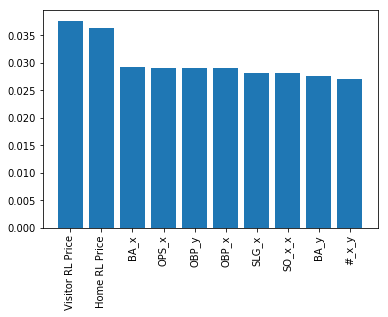

In [653]:
X1 = main(clf, stats_odds1)

In [696]:
# joblib.dump(clf, 'saved_model_6gameavg.pkl')

['saved_model_6gameavg.pkl']